Resource: https://blog.keras.io/building-autoencoders-in-keras.html

In [1]:
import numpy as np
import pandas as pd

from keras import models
from keras import layers
from keras import optimizers
from keras import Input, layers  # for 7.1.1
from keras.models import Sequential, Model  # for 7.1.1

import rpy2.robjects as robjects # used to import .Rdata into python 

Load the .Rdata into Jupyter environment using rpy2 module

In [2]:
robjects.r['load']('features.RData')

features = robjects.r['features']
features = np.array(features)

In [3]:
type(features)

numpy.ndarray

Each column corresponds to the feature vector of one image. We have 25,331 images. Feature vector length for one image s 5184. The last row corresponds to class label which we will eventually remove.

In [4]:
features.shape

(5185, 25331)

In [5]:
df = pd.DataFrame(data=features[0:,0:],
           index=[i for i in range(features.shape[0])],
           columns=['x'+str(i) for i in range(features.shape[1])])

In [6]:
df.head()
df.tail() # last row corresponds to class label (must remove)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x25321,x25322,x25323,x25324,x25325,x25326,x25327,x25328,x25329,x25330
5180,0.998080065359477,0.7294117647058823,0.7788500816993468,0.8726715686274505,0.00392156862745098,0.6113834422657944,0.7799995461147415,0.8745098039215686,0.7764705882352941,0.6857298474945532,...,0.0,0.2981118373275238,0.760602759622368,0.5568990559186638,0.03685548293391627,0.0,0.47106027596223676,0.9058823529411765,0.5568990559186638,0.7420479302832251
5181,0.998080065359477,0.7411764705882353,0.6614435820624556,0.8568218954248368,0.00392156862745098,0.5245154774872909,0.6370778867102391,0.8745098039215686,0.7176470588235294,0.6588235294117647,...,0.00519244734930969,0.2756354393609303,0.7722948438634712,0.6136891793754539,0.008097312999273841,0.00392156862745098,0.4307552650689913,0.8997095134350035,0.522839506172839,0.7801379811183732
5182,0.994240196078431,0.7375816993464054,0.5339903322440097,0.8783496732026147,0.00392156862745098,0.34007693355119845,0.48125340413943374,0.9098039215686274,0.6493055555555558,0.6123331971677559,...,0.00392156862745098,0.19150326797385592,0.7732026143790852,0.6132897603485847,0.0011982570806105173,0.00392156862745098,0.3849673202614382,0.8857298474945531,0.4891067538126358,0.7763616557734204
5183,1.0,0.7321350762527233,0.2936830519244741,0.8871459694989106,0.00392156862745098,0.12487858569353674,0.24138412309368185,0.9022875816993465,0.5390568264342778,0.5526563634713146,...,0.0,0.10951343500363087,0.6979302832244006,0.47149600580973094,0.0065722585330430525,0.0009077705156133639,0.30831517792302093,0.866485112563544,0.44796659404502515,0.7621278140885974
5184,NV,NV,MEL,NV,MEL,NV,NV,NV,NV,NV,...,NV,MEL,NV,NV,BCC,BCC,BKL,MEL,NV,BKL


In [7]:
df = df.drop([5184])

In [8]:
df.shape

(5184, 25331)

Transpose the dataframe df, so that each row corresponds to one image

In [16]:
df = df.transpose()
df.shape

(25331, 5184)

In [45]:
img = np.array(df.iloc[0,:]) # 0-th row
img = np.reshape(img, (3, 48, 36))

print(img.shape)
img = img.transpose((1,2,0))
print(img.shape)
print(img.dtype) # character type


img = img.astype(float) # float

(3, 48, 36)
(48, 36, 3)
object


In [38]:
import cmath
import matplotlib.pyplot as plt


#plt.imshow(img)

Fresh : new

In [21]:
from skimage.io import imread_collection
Data_dir = "Data/*/*.jpg"
imdata = imread_collection(Data_dir)

imdata[0] #  to access images 0,1,....25330
type(imdata)
type(imdata[0])
imdata[0].shape

(450, 600, 3)

In [24]:
imdata[2].shape

(450, 600, 3)

In [28]:
len(imdata)

int

In [33]:
im_array = np.empty([25331,36,48,3])
im_array[0,:,:,:].shape

(36, 48, 3)

In [44]:
from skimage.transform import resize

for i in range(25331):
    img_resized = resize(imdata[i], output_shape= (36,48,3))
    im_array[i,:,:,:] = img_resized
    if i%1000 == 0:
        print(i)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000


In [45]:
# np.save("im_array.npy", im_array)

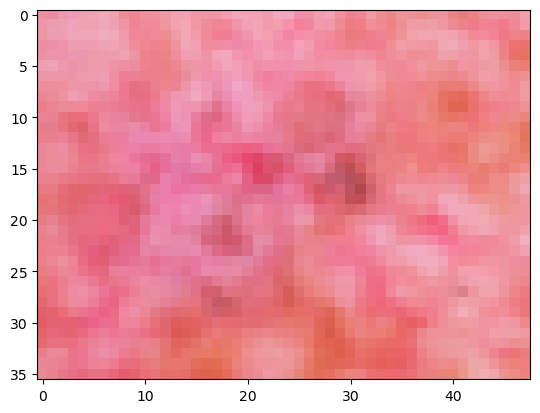

In [46]:
plt.imshow(im_array[0])

Encoder

0 to 866: class AK, so 867 belongs to class BCC

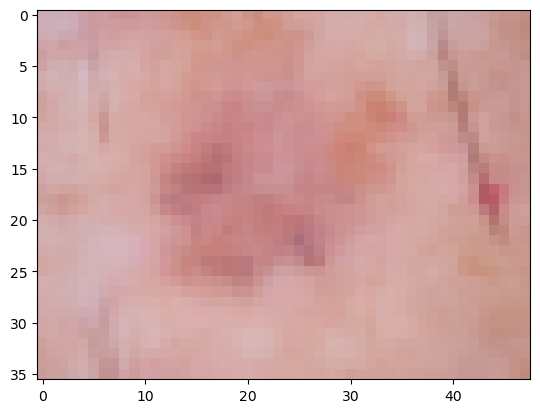

In [177]:
plt.imshow(im_array[867]) # matches with first image of BCC in actual data folder

867...4189: class BCC, so 4190 belongs to class BKL

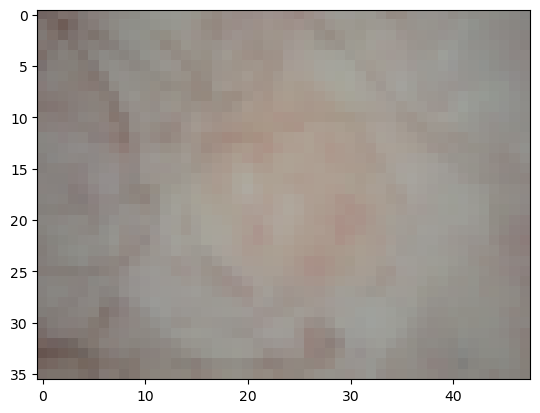

In [178]:
plt.imshow(im_array[4190]) # actually first image of BKL

4190...6813 belong to BKL, so 6814 belongs to DF

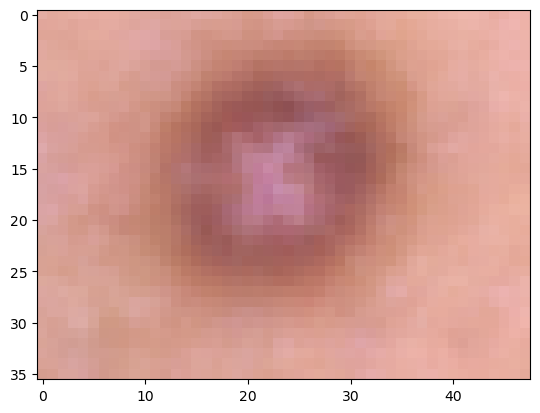

In [179]:
plt.imshow(im_array[6814]) # actually first image of DF

6814... 7052 belong to DF. So  7053 belongs to MEL

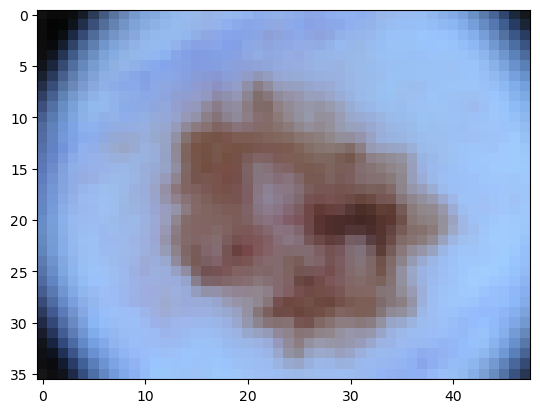

In [181]:
plt.imshow(im_array[7053]) # actually first image of MEL

7053.... 11,574 belongs to MEL. So 11,575 belongs to NV

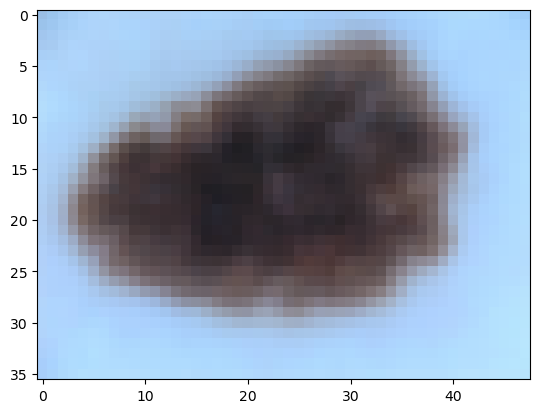

In [183]:
plt.imshow(im_array[11575]) # actually first image of NV

11,575.... 24,449 belongsto NV. 24,450 belongs to SCC

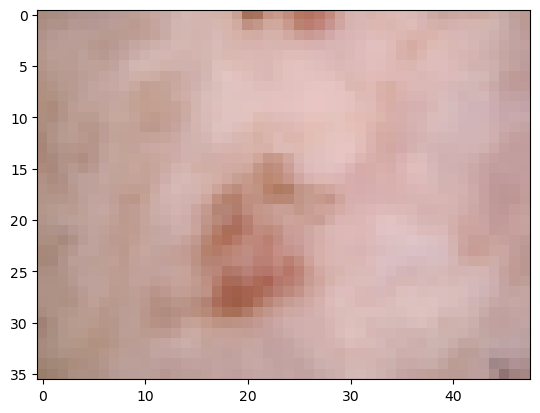

In [185]:
plt.imshow(im_array[24450]) # first image of SCC

24,450... 25,077 belong to SCC, so 25,078 belongs to VASC

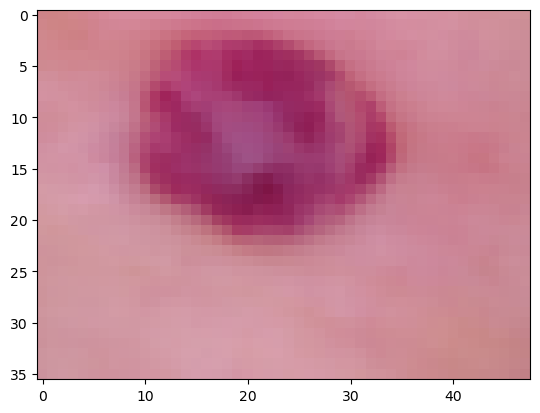

In [186]:
plt.imshow(im_array[25078]) # first image of VASC

In [153]:
input_img = Input(shape=(36, 48, 3))


x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img) # 36x48x16
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((3, 3), padding='valid')(x)

In [154]:
encoded

<KerasTensor: shape=(None, 3, 4, 4) dtype=float32 (created by layer 'max_pooling2d_53')>

reduced features 96 features
(96 PCs captured aprrox 95% variation in data)

Decoder

UpSampling(size = (1,2)) then rows and columns of the data are repeated by size[0] = 1 and size[1] = 2 respectively. So num. of rows stay the same but columns get doubled.

In [155]:
x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((3, 3))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [156]:
decoded

<KerasTensor: shape=(None, 36, 48, 3) dtype=float32 (created by layer 'conv2d_164')>

In [157]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [158]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 36, 48, 3)]       0         
                                                                 
 conv2d_158 (Conv2D)         (None, 36, 48, 16)        448       
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 18, 24, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_159 (Conv2D)         (None, 18, 24, 8)         1160      
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 9, 12, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_160 (Conv2D)         (None, 9, 12, 4)          292 

Split into train and test datasets

In [192]:
labels = ['AK'] * 867 + ['BCC'] * 3323 + ['BKL']*2624 + ['DF']*239 + ['MEL']*4522 + ['NV']*12875 + ['SCC']*628 + ['VASC']*253
len(labels)

25331

In [193]:
from sklearn.model_selection import train_test_split

train, test, label_train, label_test  = train_test_split(im_array, labels, test_size=0.25, random_state=42)


In [196]:
len(label_test)
len(label_train)

18998

In [197]:
np.save("label_train.npy", label_train)
np.save("label_test.npy", label_test)

In [198]:
autoencoder.fit(train, train, epochs=10, batch_size=512, shuffle=True, validation_data=(test,test))

Epoch 1/10
38/38 [==============================] - 21s 538ms/step - loss: 0.5887 - val_loss: 0.5878
Epoch 2/10
38/38 [==============================] - 22s 573ms/step - loss: 0.5885 - val_loss: 0.5876
Epoch 3/10
38/38 [==============================] - 17s 443ms/step - loss: 0.5879 - val_loss: 0.5870
Epoch 4/10
38/38 [==============================] - 18s 483ms/step - loss: 0.5876 - val_loss: 0.5867
Epoch 5/10
38/38 [==============================] - 15s 405ms/step - loss: 0.5874 - val_loss: 0.5862
Epoch 6/10
38/38 [==============================] - 18s 484ms/step - loss: 0.5868 - val_loss: 0.5863
Epoch 7/10
38/38 [==============================] - 17s 436ms/step - loss: 0.5867 - val_loss: 0.5856
Epoch 8/10
38/38 [==============================] - 18s 472ms/step - loss: 0.5862 - val_loss: 0.5857
Epoch 9/10
38/38 [==============================] - 18s 480ms/step - loss: 0.5859 - val_loss: 0.5851
Epoch 10/10
38/38 [==============================] - 20s 505ms/step - loss: 0.5857 - val_lo

In [199]:
decoded_imgs = autoencoder.predict(test)

198/198 [==============================] - 1s 6ms/step


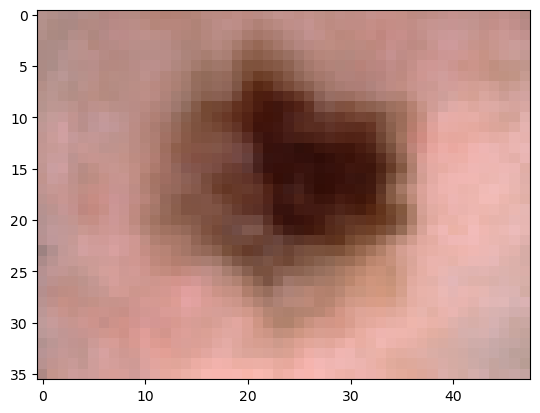

In [164]:
plt.imshow(test[2])

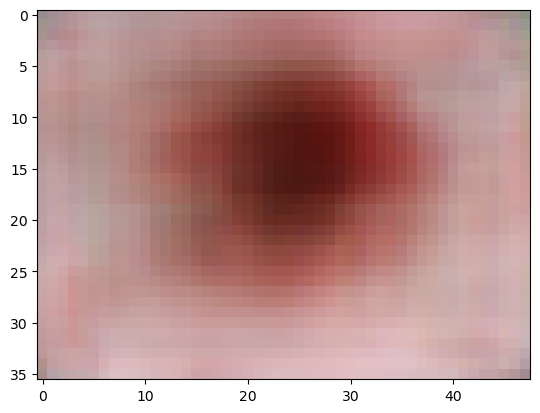

In [165]:
plt.imshow(decoded_imgs[2])

"encoder" object below gives reduced features. 

Encode the train set images

In [200]:
encoder = Model(input_img, encoded)
encoded_train = encoder(train)

encoded_train.shape # encoded features

TensorShape([18998, 3, 4, 4])

In [201]:
encoded_train_array = np.asarray(encoded_train)
encoded_train_array.shape

(18998, 3, 4, 4)

In [202]:
np.save("encoded_train_new.npy", encoded_train_array )

Encoding the test set as well

In [203]:
encoded_test = encoder(test)
encoded_test_array = np.asarray(encoded_test)
encoded_test_array.shape

(6333, 3, 4, 4)

In [204]:
np.save("encoded_test_new.npy", encoded_test_array )